In [3]:
from ftplib import FTP
import ftputil
import xarray as xr
import pandas as pd
import numpy as np
import datetime
import pygrib as pg
import glob
import os
from pathlib import Path
from datetime import timedelta

In [7]:
inpath = '/home/opn/script/siam-netcdf-generator/coba/tes/envyosa/arpege/input/'

In [18]:
# A_YMJU89ARPM120000_C_LFPW_------120000--.bin
def filenamegen():
    import string
    alphabet_list = [letter for letter in string.ascii_uppercase]
    filenames = [f'A_YMJ{x}89ARPM120000_C_LFPW_------120000--.bin' for x in alphabet_list]   
    return filenames

In [29]:
def filedownload(grbzname, maxretry : int=3,retryfreq : int = 3):      
    import time
    with ftputil.FTPHost("172.19.0.47", "transmet2023", "99xrAQbW2qN7h") as ftp_host:
        file = f'MODELARPEGE/{grbzname}'
        basename = os.path.basename(file)
        inpathbin = Path(f'{inpath}')
        fout = Path(inpathbin, basename)
        fout.parent.mkdir(parents=True, exist_ok=True)
    
        if fout.exists():
            return fout
        else:
            for i in range(maxretry):
                if ftp_host.path.exists(file):
                    ftp_host.download(file,fout)
                    print(f'file downloaded {fout}')
                    return fout
                else:
                    print(f'File {file} not found')
                time.sleep(retryfreq)
            print(f'File {file} not found after {maxretry} retries')
            pass

In [30]:
coba = filenamegen()

In [65]:
for file in coba:
    filedownload(file)

File MODELARPEGE/A_YMJV89ARPM120000_C_LFPW_------120000--.bin not found
File MODELARPEGE/A_YMJV89ARPM120000_C_LFPW_------120000--.bin not found
File MODELARPEGE/A_YMJV89ARPM120000_C_LFPW_------120000--.bin not found


KeyboardInterrupt: 

In [59]:
filename = glob.glob('input/*.bin')
filename = filename[1:]
# filename = filename[:16] + [filename[-1]] +filename[16:-1]

In [85]:
ds3 = xr.open_mfdataset(filename, engine="cfgrib",
        backend_kwargs=dict(filter_by_keys={"typeOfLevel": "surface", 'edition': 1}),
        concat_dim='valid_time', combine='nested', parallel=True)

In [68]:
ds3

<xarray.Dataset>
Dimensions:     (latitude: 131, longitude: 201, valid_time: 21)
Coordinates:
    time        datetime64[ns] 2024-02-12
    step        (valid_time) timedelta64[ns] 0 days 03:00:00 ... 3 days 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 40.0 39.5 39.0 38.5 ... -24.0 -24.5 -25.0
  * longitude   (longitude) float64 70.0 70.5 71.0 71.5 ... 169.0 169.5 170.0
  * valid_time  (valid_time) datetime64[ns] 2024-02-12T03:00:00 ... 2024-02-15
Data variables:
    sp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    tcc         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    CAPE_INS    (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    p3099       (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-02-12T12:02 GRIB to CDM+CF via cfgrib-0.9.1...

In [86]:
step = ds3.step.values
step = step.astype('timedelta64[h]')
step

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 54,
       60, 66, 72, 51], dtype='timedelta64[h]')

In [82]:
ds3 = ds3.sortby(ds3.valid_time)

In [111]:
time = ds3.valid_time.values

In [129]:
time

array(['2024-02-12T03:00:00.000000000', '2024-02-12T06:00:00.000000000',
       '2024-02-12T09:00:00.000000000', '2024-02-12T12:00:00.000000000',
       '2024-02-12T15:00:00.000000000', '2024-02-12T18:00:00.000000000',
       '2024-02-12T21:00:00.000000000', '2024-02-13T00:00:00.000000000',
       '2024-02-13T03:00:00.000000000', '2024-02-13T06:00:00.000000000',
       '2024-02-13T09:00:00.000000000', '2024-02-13T12:00:00.000000000',
       '2024-02-13T15:00:00.000000000', '2024-02-13T18:00:00.000000000',
       '2024-02-13T21:00:00.000000000', '2024-02-14T00:00:00.000000000',
       '2024-02-14T06:00:00.000000000', '2024-02-14T12:00:00.000000000',
       '2024-02-14T18:00:00.000000000', '2024-02-15T00:00:00.000000000',
       '2024-02-14T03:00:00.000000000'], dtype='datetime64[ns]')

In [130]:
time0 = np.datetime64(dtn)

In [131]:
np.append(time0,time)

array(['2024-02-12T00:00:00.000000000', '2024-02-12T03:00:00.000000000',
       '2024-02-12T06:00:00.000000000', '2024-02-12T09:00:00.000000000',
       '2024-02-12T12:00:00.000000000', '2024-02-12T15:00:00.000000000',
       '2024-02-12T18:00:00.000000000', '2024-02-12T21:00:00.000000000',
       '2024-02-13T00:00:00.000000000', '2024-02-13T03:00:00.000000000',
       '2024-02-13T06:00:00.000000000', '2024-02-13T09:00:00.000000000',
       '2024-02-13T12:00:00.000000000', '2024-02-13T15:00:00.000000000',
       '2024-02-13T18:00:00.000000000', '2024-02-13T21:00:00.000000000',
       '2024-02-14T00:00:00.000000000', '2024-02-14T06:00:00.000000000',
       '2024-02-14T12:00:00.000000000', '2024-02-14T18:00:00.000000000',
       '2024-02-15T00:00:00.000000000', '2024-02-14T03:00:00.000000000'],
      dtype='datetime64[ns]')

In [83]:
step = ds3.step.values
step = step.astype('timedelta64[h]')
step

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54, 60, 66, 72], dtype='timedelta64[h]')

In [3]:
grbs = pg.open('A_YMJA89ARPM111800_C_LFPW_------111800--.bin')
grbsz = pg.open('A_YMJZ89ARPM111800_C_LFPW_------111800--.bin')
grbsb = pg.open('A_YMJB89ARPM111800_C_LFPW_------111800--.bin')
grbss = pg.open('A_YMJS89ARPM111800_C_LFPW_------111800--.bin')


In [71]:
grbs

In [136]:
grbss.seek(0)
for grb in grbss:
    print(grb)

1:Geopotential:m**2 s**-2 (instant):regular_ll:isobaricInhPa:level 200:fcst time 60 hrs:from 202402111800
2:Geopotential:m**2 s**-2 (instant):regular_ll:isobaricInhPa:level 250:fcst time 60 hrs:from 202402111800
3:Geopotential:m**2 s**-2 (instant):regular_ll:isobaricInhPa:level 300:fcst time 60 hrs:from 202402111800
4:Geopotential:m**2 s**-2 (instant):regular_ll:isobaricInhPa:level 400:fcst time 60 hrs:from 202402111800
5:Geopotential:m**2 s**-2 (instant):regular_ll:isobaricInhPa:level 500:fcst time 60 hrs:from 202402111800
6:Geopotential:m**2 s**-2 (instant):regular_ll:isobaricInhPa:level 600:fcst time 60 hrs:from 202402111800
7:Geopotential:m**2 s**-2 (instant):regular_ll:isobaricInhPa:level 700:fcst time 60 hrs:from 202402111800
8:Geopotential:m**2 s**-2 (instant):regular_ll:isobaricInhPa:level 800:fcst time 60 hrs:from 202402111800
9:Geopotential:m**2 s**-2 (instant):regular_ll:isobaricInhPa:level 850:fcst time 60 hrs:from 202402111800
10:Geopotential:m**2 s**-2 (instant):regular_l

In [127]:
def gendts():
    import datetime
    dtn = datetime.datetime.utcnow()
    if (dtn.hour >= 0) & (dtn.hour < 12):
        cycl = 0
    elif (dtn.hour >= 12) & (dtn.hour <= 24):
        cycl = 12
    
    dtc = datetime.datetime(dtn.year,dtn.month,dtn.day,cycl)
    return dtc

In [128]:
dtn = gendts()
dtn

datetime.datetime(2024, 2, 12, 0, 0)

In [137]:
grbss.seek(0)
name = [[f'{x.name},{x.shortName},{x.typeOfLevel},{x.step}'] for x in grbss]

In [138]:
np.unique(name)

array(['10 metre U wind component,10u,heightAboveGround,60',
       '10 metre V wind component,10v,heightAboveGround,60',
       '2 metre temperature,2t,heightAboveGround,60',
       'Absolute vorticity,absv,isobaricInhPa,60',
       'Convective Available Potential Energy instantaneous,CAPE_INS,surface,60',
       'Geopotential,z,isobaricInhPa,60',
       'Geopotential,z,potentialVorticity,60',
       'Mean sea level pressure,msl,meanSea,60',
       'Potential vorticity,pv,isobaricInhPa,60',
       'Pseudo-adiabatic potential temperature,papt,isobaricInhPa,60',
       'Relative humidity,r,heightAboveGround,60',
       'Relative humidity,r,isobaricInhPa,60',
       'Snow melt,snom,surface,60', 'Surface pressure,sp,surface,60',
       'Temperature,t,heightAboveGround,60',
       'Temperature,t,isobaricInhPa,60',
       'Total Cloud Cover,tcc,surface,60',
       'Total Precipitation,tp,surface,60',
       'U component of wind,u,heightAboveGround,60',
       'U component of wind,u,isobaric

In [35]:
ds3 = xr.open_mfdataset('A_HMJD80ARPM120000_C_LFPW_------120000--.bin', engine="cfgrib",
        backend_kwargs=dict(filter_by_keys={"typeOfLevel": "surface", 'edition': 1}),
        concat_dim='valid_time', combine='nested', parallel=True)
# ds = xr.open_mfdataset('A_YMJZ89ARPM111800_C_LFPW_------111800--.bin', engine="cfgrib",
#         backend_kwargs=dict(filter_by_keys={"typeOfLevel": "surface", 'edition': 1}),
#         concat_dim='valid_time', combine='nested', parallel=True)

In [36]:
ds3

<xarray.Dataset>
Dimensions:     (latitude: 121, longitude: 240, valid_time: 1)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude   (longitude) float64 0.0 1.5 3.0 4.5 ... 354.0 355.5 357.0 358.5
  * valid_time  (valid_time) datetime64[ns] 2024-02-12T18:00:00
Data variables:
    sp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 121, 240), meta=np.ndarray>
    CAPE_INS    (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 121, 240), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 121, 240), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-02-12T10:23 GRIB to CDM+CF via cfgrib-0.9.1...

In [9]:
filename= glob.glob('*.bin')

In [18]:
filename = filename[2:] + filename[0:1] 

In [72]:
dtn = datetime.datetime.now()

In [76]:
f'{dtn:%d}'

'12'

In [41]:
ds = xr.open_mfdataset("A_YMJU89ARPM111200_C_LFPW_------111200--.bin", engine="cfgrib",
        backend_kwargs=dict(filter_by_keys={"typeOfLevel": "surface", 'edition': 1}),
        concat_dim='valid_time', combine='nested', parallel=True)

In [42]:
step = ds3.step.values
days = step.astype('timedelta64[h]')

In [43]:
days

numpy.timedelta64(18,'h')

In [35]:
grbs = pg.open('input/A_YMJA89ARPM120000_C_LFPW_------120000--.bin')

In [40]:
dmnd = ['absv', 'papt', 'pv', 'r', 't', 'u', 'v', 'w', 'z']

In [ ]:
'r', 't', 'u', 'v', 'w', 'z' # yang levelnya sama (13 level)

In [115]:
grbs.seek(0)
selectr = grbs.select(shortName='u',typeOfLevel='isobaricInhPa')
selectr

[78:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200:fcst time 0 hrs:from 202402120000,
 79:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 250:fcst time 0 hrs:from 202402120000,
 80:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 300:fcst time 0 hrs:from 202402120000,
 81:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 400:fcst time 0 hrs:from 202402120000,
 82:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 500:fcst time 0 hrs:from 202402120000,
 83:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 600:fcst time 0 hrs:from 202402120000,
 84:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 700:fcst time 0 hrs:from 202402120000,
 85:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 800:fcst time 0 hrs:from 202402120000,
 86:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 850:fcst time 0 hrs:from 202402

In [104]:
select

[48:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 200:fcst time 0 hrs:from 202402120000,
 49:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 250:fcst time 0 hrs:from 202402120000,
 50:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 300:fcst time 0 hrs:from 202402120000,
 51:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 400:fcst time 0 hrs:from 202402120000,
 52:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 500:fcst time 0 hrs:from 202402120000,
 53:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 600:fcst time 0 hrs:from 202402120000,
 54:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 700:fcst time 0 hrs:from 202402120000,
 55:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 800:fcst time 0 hrs:from 202402120000,
 56:Absolute vorticity:s**-1 (instant):regular_ll:isobaricInhPa:level 850:fcst time 0 hrs:from 202402120000]

In [103]:
grbs.seek(0)
select = grbs.select(shortName='absv',typeOfLevel='isobaricInhPa')

In [99]:
grbs.seek(0)
selectav = grbs.select(shortName='pv')

In [101]:
def sortLev(e):
    return e['level']
selectav.sort(key=sortLev)

In [102]:
selectav

[47:Potential vorticity:K m**2 kg**-1 s**-1 (instant):regular_ll:isobaricInhPa:level 200:fcst time 0 hrs:from 202402120000,
 46:Potential vorticity:K m**2 kg**-1 s**-1 (instant):regular_ll:isobaricInhPa:level 250:fcst time 0 hrs:from 202402120000,
 45:Potential vorticity:K m**2 kg**-1 s**-1 (instant):regular_ll:isobaricInhPa:level 300:fcst time 0 hrs:from 202402120000,
 44:Potential vorticity:K m**2 kg**-1 s**-1 (instant):regular_ll:isobaricInhPa:level 500:fcst time 0 hrs:from 202402120000,
 43:Potential vorticity:K m**2 kg**-1 s**-1 (instant):regular_ll:isobaricInhPa:level 600:fcst time 0 hrs:from 202402120000,
 42:Potential vorticity:K m**2 kg**-1 s**-1 (instant):regular_ll:isobaricInhPa:level 700:fcst time 0 hrs:from 202402120000,
 41:Potential vorticity:K m**2 kg**-1 s**-1 (instant):regular_ll:isobaricInhPa:level 850:fcst time 0 hrs:from 202402120000]

In [83]:
def sortFunc(e):
    return e['shortName'], e['level']

In [111]:
len(selectav)

7

In [84]:
select.sort(key=sortFunc)

In [85]:
namelev = [f'{grb.shortName}' for grb in select]

In [86]:
np.unique(namelev)

array(['CAPE_INS', 'h', 'lsm', 'sp', 'tcc'], dtype='<U8')

In [92]:
ds = xr.open_mfdataset(filename, engine="cfgrib",
        backend_kwargs=dict(filter_by_keys={"shortName": "msl"}),
        concat_dim='valid_time', combine='nested', parallel=True)

In [93]:
ds

<xarray.Dataset>
Dimensions:     (latitude: 131, longitude: 201, valid_time: 21)
Coordinates:
    time        datetime64[ns] 2024-02-12
    step        (valid_time) timedelta64[ns] 0 days 03:00:00 ... 2 days 03:00:00
    meanSea     float64 0.0
  * latitude    (latitude) float64 40.0 39.5 39.0 38.5 ... -24.0 -24.5 -25.0
  * longitude   (longitude) float64 70.0 70.5 71.0 71.5 ... 169.0 169.5 170.0
  * valid_time  (valid_time) datetime64[ns] 2024-02-12T03:00:00 ... 2024-02-1...
Data variables:
    msl         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-02-13T13:12 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
filename = glob.glob('input/*.bin')
filename = filename[1:]

In [79]:
dsl = xr.open_mfdataset(filename, engine="cfgrib",
        backend_kwargs=dict(filter_by_keys={"typeOfLevel": "heightAboveGround",'shortName' : '10v', 'level':10, 'edition': 1}),
        concat_dim='valid_time', combine='nested', parallel=True)

In [80]:
dsl

<xarray.Dataset>
Dimensions:            (latitude: 131, longitude: 201, valid_time: 21)
Coordinates:
    time               datetime64[ns] 2024-02-12
    step               (valid_time) timedelta64[ns] 03:00:00 ... 2 days 03:00:00
    heightAboveGround  float64 10.0
  * latitude           (latitude) float64 40.0 39.5 39.0 ... -24.0 -24.5 -25.0
  * longitude          (longitude) float64 70.0 70.5 71.0 ... 169.0 169.5 170.0
  * valid_time         (valid_time) datetime64[ns] 2024-02-12T03:00:00 ... 20...
Data variables:
    v10                (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-02-13T12:09 GRIB to CDM+CF via cfgrib-0.9.1...

In [28]:
levels = dsl.isobaricInhPa.values

In [112]:
ds = xr.open_mfdataset(filename, engine="cfgrib",
        backend_kwargs=dict(filter_by_keys={"typeOfLevel": "surface", 'edition': 1}),
        concat_dim='valid_time', combine='nested', parallel=True)

In [64]:
ds.assign_coords(level=("level" ,levels))

<xarray.Dataset>
Dimensions:     (latitude: 131, level: 13, longitude: 201, valid_time: 21)
Coordinates:
    time        datetime64[ns] 2024-02-12
    step        (valid_time) timedelta64[ns] 0 days 03:00:00 ... 2 days 03:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 40.0 39.5 39.0 38.5 ... -24.0 -24.5 -25.0
  * longitude   (longitude) float64 70.0 70.5 71.0 71.5 ... 169.0 169.5 170.0
  * valid_time  (valid_time) datetime64[ns] 2024-02-12T03:00:00 ... 2024-02-1...
  * level       (level) float64 1e+03 950.0 925.0 900.0 ... 300.0 250.0 200.0
Data variables:
    sp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    tcc         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    CAPE_INS    (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    p3099       (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-02-13T11:56 GRIB to CDM+CF via cfgrib-0.9.1...

In [33]:
ds

<xarray.Dataset>
Dimensions:     (latitude: 131, longitude: 201, valid_time: 21)
Coordinates:
    time        datetime64[ns] 2024-02-12
    step        (valid_time) timedelta64[ns] 0 days 03:00:00 ... 2 days 03:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 40.0 39.5 39.0 38.5 ... -24.0 -24.5 -25.0
  * longitude   (longitude) float64 70.0 70.5 71.0 71.5 ... 169.0 169.5 170.0
  * valid_time  (valid_time) datetime64[ns] 2024-02-12T03:00:00 ... 2024-02-1...
Data variables:
    sp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    tcc         (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    CAPE_INS    (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
    p3099       (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 131, 201), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-02-13T11:33 GRIB to CDM+CF via cfgrib-0.9.1...

In [22]:
levels

NameError: name 'levels' is not defined

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('/mnt/data/output/arpege/arpege_20240218_1800.nc')

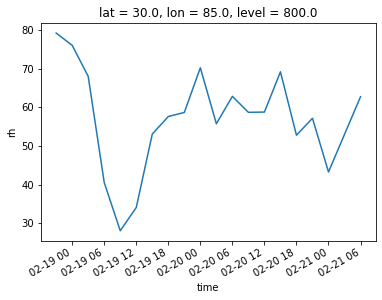

In [7]:
ds['rh'][:,5,20,30].plot()